<strong>NOTE:</strong> When the normalizer is adapted on X_train, the loss function decreases much faster than when the normalizer is adapted on all the features.

In [1]:
import pandas as pd
import tensorflow as tf

dataframe = pd.read_csv("Energy.csv")
dataframe

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


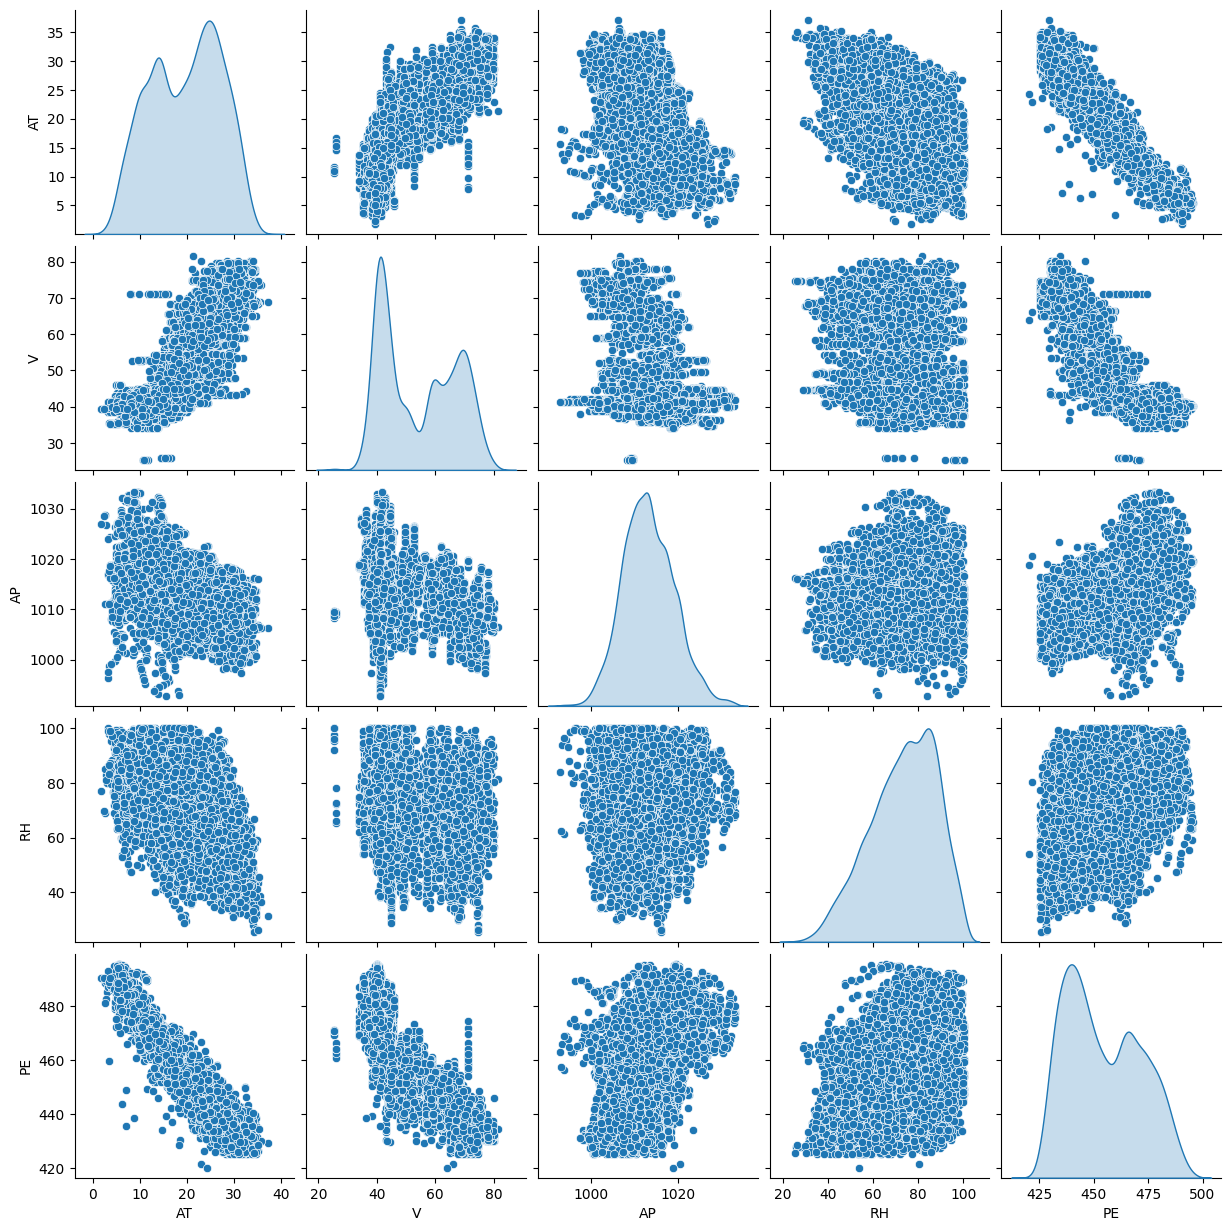

In [2]:
import seaborn as sb
sb.pairplot(data = dataframe, kind = 'scatter', diag_kind = 'kde')

In [3]:
### Seperate Data
features = dataframe.iloc[:, :-1]
label = dataframe.iloc[:, -1]

In [4]:
### Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features.values, label.values, test_size = 0.3)

In [5]:
### Standardize Data
from sklearn.preprocessing import StandardScaler
training_scaler = StandardScaler()
testing_scaler = StandardScaler()

X_train = training_scaler.fit_transform(X_train)
X_test = testing_scaler.fit_transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6697, 4), (2871, 4), (6697,), (2871,))

In [6]:
### Build Model
from keras import Sequential
from keras.layers import InputLayer, Dense
from keras.losses import MeanAbsoluteError
from keras.metrics import MeanSquaredError, R2Score
from keras.optimizers import Adam

ANN = Sequential()
ANN.add( InputLayer( shape = (4,) ) )
ANN.add( Dense( units = 25, activation = "relu" ) )
ANN.add( Dense( units = 25, activation = "relu" ) )
ANN.add( Dense( units = 1 ) )
ANN.compile( optimizer = Adam(), loss = MeanAbsoluteError(), metrics = [MeanSquaredError(), R2Score()])

### Train
ANN.fit( X_train, y_train, epochs = 50)

Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 450.0201 - mean_squared_error: 202881.2969 - r2_score: -698.9742
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 345.7374 - mean_squared_error: 126337.7188 - r2_score: -430.6031
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.7513 - mean_squared_error: 24402.0410 - r2_score: -84.3298
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94.0402 - mean_squared_error: 12720.3223 - r2_score: -42.7667
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51.5687 - mean_squared_error: 4400.1074 - r2_score: -14.2693
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.0163 - mean_squared_error: 793.9416 - r2_score: -1.7526
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3319 - mean_squared_error: 106.9604 - r2_score: 0.6266
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5246 - mean_squared_error: 38.8073 - r2_score: 0.8662
Epoch 9/50
210/210 ━━━━━━━━━━━━━

In [7]:
### Evaluate
ANN.evaluate(X_test, y_test)

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4790 - mean_squared_error: 19.6553 - r2_score: 0.9344


[3.4559717178344727, 19.52004623413086, 0.9342155456542969]

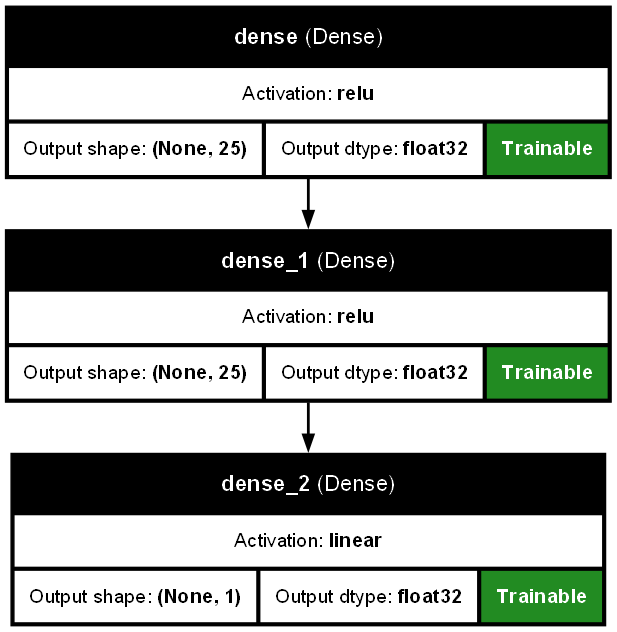

In [8]:
from keras.utils import plot_model
plot_model(
  model = ANN, 
  to_file = "model.png", 
  show_shapes = True, 
  show_dtype = True, 
  show_layer_names = True, 
  show_layer_activations = True, 
  show_trainable = True,
  dpi = 100 # size
  ) 